In [114]:
import os 
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

In [115]:
plt.rcParams["font.family"] = "Arial"

In [116]:
__path__ = os.getcwd()

In [124]:
# Only getting M+0 - M+4, the isotopologues that were consistently quantified
data = pd.read_csv(
    os.path.join(__path__, "..", "data", "mct1_tracing_data", "citrate-tracing.txt"),
    sep="\t")

In [125]:
data.loc[data["Condition"] == "WT + EV", "Condition"] = "WT"
data.loc[data["Condition"] == "mct1-del + EV", "Condition"] = "$\it{mct1}\Delta$"

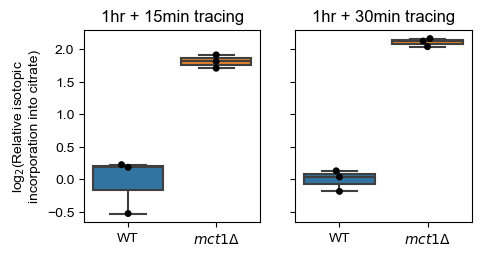

In [126]:
# Plot just 1 hr
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(5,2.5))
counter = 0
for x in data["Timepoint"].unique():
    d = data.loc[data["Timepoint"] == x][["Condition", "M+2"]]
    d.index = d["Condition"]
    d = d.drop("Condition", axis=1)
    d.index.name = None
    d["M+2"] = np.log2(d["M+2"] / d.loc[d.index == "WT"]["M+2"].mean())
    sns.boxplot(x=d.index, y=d["M+2"], ax=axes[counter])
    sns.swarmplot(x=d.index, y=d["M+2"], ax=axes[counter], color="black")
    axes[counter].set_title("{0} + {1} tracing".format(x.split(" ")[0], x.split(" ")[1]))
    if counter == 0:
        axes[counter].set_ylabel("log$_2$(Relative isotopic \nincorporation into citrate)")
    else:
        axes[counter].set_ylabel("")
    counter += 1
    if counter == 2:
        break
plt.savefig("citrate-1hr.png", dpi=1200, bbox_inches = 'tight')

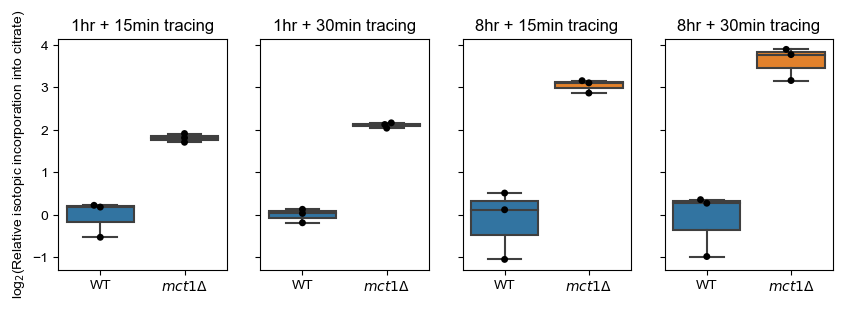

In [127]:
fig, axes = plt.subplots(1, 4, sharey=True, figsize=(10,3))
counter = 0
for x in data["Timepoint"].unique():
    d = data.loc[data["Timepoint"] == x][["Condition", "M+2"]]
    d.index = d["Condition"]
    d = d.drop("Condition", axis=1)
    d.index.name = None
    d["M+2"] = np.log2(d["M+2"] / d.loc[d.index == "WT"]["M+2"].mean())
    sns.boxplot(x=d.index, y=d["M+2"], ax=axes[counter])
    sns.swarmplot(x=d.index, y=d["M+2"], ax=axes[counter], color="black")
    axes[counter].set_title("{0} + {1} tracing".format(x.split(" ")[0], x.split(" ")[1]))
    if counter == 0:
        axes[counter].set_ylabel("log$_2$(Relative isotopic incorporation into citrate)")
    else:
        axes[counter].set_ylabel("")
    counter += 1
plt.savefig("citrate.png", dpi=1200, bbox_inches = 'tight')